## The libraries
#### A list of the libraries that will be used for this code.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
#For pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#for creating pikle fiies
from joblib import dump
import pickle

# For splitting data into training and testing
from sklearn.model_selection import train_test_split

# metrics for calculations
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#the new models
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#for data visualization 
# import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report


# for hyperParameterTuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# for creating deep learning models
from tensorflow import keras
from tensorflow.keras import layers

#for predicting the output
# from PE_file import func

## Importing and analysis of the Dataset
#### Loading the data into the python code and running the preliminary analysis on the dataset

In [3]:
df = pd.read_csv('data.csv', sep = '|')

In [4]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,Windows.Internal.Shell.Broker.dll,09e83f1d1c99ad33009dbe6fb129c2d9,34404,240,8226,14,12,779776,253952,0,...,2,3.072050,2.706833,3.437268,604.000000,200,1008,256,16,1
1,hidserv.dll,3030f19c6a73367d6d5eedd157f5d01a,34404,240,8226,14,12,21504,13312,0,...,3,3.056204,2.709457,3.465499,515.333333,200,932,256,16,1
2,DmApiSetExtImplDesktop.dll,8271846f8f5dd1cfddaa957b1b9da1a2,34404,240,8226,14,12,33792,27648,0,...,1,3.466474,3.466474,3.466474,980.000000,980,980,256,16,1
3,FSResizerSetup27.exe,5802b4215566bb9593a736e945a28e99,332,224,271,6,0,23552,164864,1024,...,9,3.032143,1.971335,5.102472,363.444444,34,744,0,0,1
4,asc-setup.exe,8cb1fb45489d065720285deeccbacd98,332,224,33167,2,25,87040,71680,0,...,19,4.402265,2.699131,6.600332,3275.473684,16,33512,0,15,1


In [5]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 55 numerical features : ['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb', 'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy', 'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize', 'SectionsMeanVirtualsize', 'SectionsMinVirtualsize', 'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb', 'ImportsNbOrdinal', 'ExportNb', 'ResourcesNb', 'ResourcesMeanEntropy', 'ResourcesMinEntropy',

In [6]:
num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns

In [7]:
num_features = num_features.drop("legitimate")

## Data splitting and pre-processing 
#### Creating the test and train datasets and then pre-processing both the datasets

In [8]:
train_data,test_data=train_test_split(df,test_size=0.24,random_state=42)


In [9]:
num_pipeline= Pipeline(
                steps=[
                ("imputer",SimpleImputer(strategy="median")),
                ("scaler",StandardScaler())

                ]
            )

cat_pipeline=Pipeline(

    steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore')),
    ("scaler",StandardScaler(with_mean=False))
    ]

)

In [10]:
preprocessor=ColumnTransformer(
                [
                ("num_pipeline",num_pipeline,num_features),
                ("cat_pipelines",cat_pipeline,cat_features)
                ])

In [11]:
target_column_name = "legitimate"

input_feature_train_data=train_data.drop(columns=[target_column_name],axis=1)
target_feature_train_data=train_data[target_column_name]

input_feature_test_data=test_data.drop(columns=[target_column_name],axis=1)
target_feature_test_data=test_data[target_column_name]
            
input_feature_train = preprocessor.fit_transform(input_feature_train_data)
input_feature_test = preprocessor.transform(input_feature_test_data)
            
train_array = np.c_[input_feature_train.toarray(),np.array(target_feature_train_data)]
test_array = np.c_[input_feature_test.toarray(),np.array(target_feature_test_data)]


In [47]:
with open("preprocessor.pkl","wb") as f:
    pickle.dump(preprocessor, f)

In [12]:
X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

## Modelling and training the data
#### Initializing the models and function to fit the splitted data into the various models being considered.

In [13]:
new_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
}

In [14]:
def evaluate_model(true, predicted):
    metrics = []
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    metrics.append((mae, rmse,precision, recall, f1))
    return r2_square,accuracy,metrics

In [15]:
model_list = []
r2_list =[]
accuracy_list = []
# RMSE_list = []
# MAE_list = []

for i in range(len(list(new_models))):
    model = list(new_models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_r2,model_train_accuracy,train_metrics = evaluate_model(y_train, y_train_pred)

    model_test_r2,model_test_accuracy,test_metrics = evaluate_model(y_test, y_test_pred)

    
    print(list(new_models.keys())[i])
    model_list.append(list(new_models.keys())[i])
    
    print('Model performance for Training set')
    # print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    # print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Accusracy: {:.4f}".format(model_train_accuracy))

    print('----------------------------------')
    
    print('Model performance for Test set')
    # print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    # print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Accusracy: {:.4f}".format(model_test_accuracy))
    
    # appending the r2 score, mean absolute erroor and root mean squared error
    # RMSE_list.append(model_test_rmse)
    # MAE_list.append(model_test_mae)
    r2_list.append(model_test_r2)
    accuracy_list.append(model_test_accuracy)
    
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- R2 Score: 1.0000
- Accusracy: 1.0000
----------------------------------
Model performance for Test set
- R2 Score: 0.8372
- Accusracy: 0.9636


K-Neighbors Classifier
Model performance for Training set
- R2 Score: -1.9795
- Accusracy: 0.3356
----------------------------------
Model performance for Test set
- R2 Score: -1.9695
- Accusracy: 0.3368


Decision Tree
Model performance for Training set
- R2 Score: 1.0000
- Accusracy: 1.0000
----------------------------------
Model performance for Test set
- R2 Score: 0.8885
- Accusracy: 0.9751


Random Forest Classifier
Model performance for Training set
- R2 Score: 1.0000
- Accusracy: 1.0000
----------------------------------
Model performance for Test set
- R2 Score: 0.9168
- Accusracy: 0.9814


XGBClassifier
Model performance for Training set
- R2 Score: 0.9989
- Accusracy: 0.9998
----------------------------------
Model performance for Test set
- R2 Score: 0.9186
- Accusracy: 0.9818

## Visualizing the results 
#### Creating tables , plots, charts and other visualizing tools for understanding the primary result achieved

In [16]:
table  = pd.DataFrame(list(zip(model_list, r2_list,accuracy_list)), columns=['Model Name', 'R2_Score',"Accuracy"]).sort_values(by=["R2_Score"],ascending=False)

In [17]:
table

,Model Name,R2_Score,Accuracy
4,XGBClassifier,0.918596,0.981818
3,Random Forest Classifier,0.916826,0.981423
5,CatBoosting Classifier,0.909748,0.979842
6,Gradient Boosting Classifier,0.899130,0.977470
2,Decision Tree,0.888512,0.975099
7,AdaBoost Classifier,0.870815,0.971146
0,Logistic Regression,0.837192,0.963636
8,Naive Bayes,-1.950017,0.341107
1,K-Neighbors Classifier,-1.969484,0.336759


In [18]:
XGB_model = XGBClassifier()
XGB_model = XGB_model.fit(X_train,y_train)
y_pred = XGB_model.predict(X_test)
score  = r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 91.86


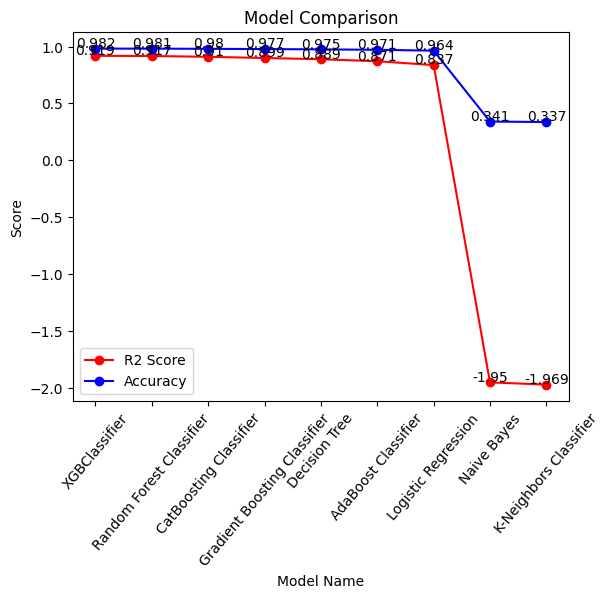

In [19]:
X_axis = table['Model Name']
Y_axis_1 = table['R2_Score']
Y_axis_2 = table['Accuracy']

# Create the plot
fig, ax = plt.subplots()

ax.plot(X_axis, Y_axis_1, color='red', marker='o', label='R2 Score')
ax.plot(X_axis, Y_axis_2, color='blue', marker='o', label='Accuracy')

for i, j in zip(X_axis, Y_axis_1):
    ax.annotate(str(round(j, 3)), xy=(i, j), xytext=(i, j+0.01), ha='center')

for i, j in zip(X_axis, Y_axis_2):
    ax.annotate(str(round(j, 3)), xy=(i, j), xytext=(i, j+0.01), ha='center')

# Set axis labels and title
plt.xticks(rotation=50)
plt.title('Model Comparison')
plt.xlabel('Model Name')
plt.ylabel('Score')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,1.0,1,0.0
1,1.0,0,1.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0
...,...,...,...
2525,0.0,0,0.0
2526,1.0,1,0.0
2527,0.0,0,0.0
2528,0.0,0,0.0


## HyperParameter Tuning
### Tuning the parameters for each of the algorithms used to reach the most optimal result

In [28]:
params={
            "Naive Bayes":{},
            "Decision Tree": {
                'criterion':['gini', 'entropy', 'log_loss'],
                # 'splitter':['best','random'],
                # 'max_features':['auto','sqrt','log2'],
            },
            "Random Forest Classifier":{
                # 'criterion':['gini', 'entropy', 'log_loss'],       
                # 'max_features':['sqrt','log2',None],
                'n_estimators': [8,16,32,64,128,256]
            },
            "Gradient Boosting Classifier":{
                # 'loss':['log_loss', 'deviance', 'exponential'],
                # 'learning_rate':[.1,.01,.05,.001],
                # 'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                # 'criterion':['squared_error', 'friedman_mse'],
                # 'max_features':['auto','sqrt','log2'],
                # 'n_estimators': [8,16,32,64,128,256]
            },
            "Logistic Regression":{},
            "XGBClassifier":{
                # 'learning_rate':[.1,.01,.05,.001],
                'n_estimators': [8,16,32,64,128,256]
            },
            "CatBoosting Classifier":{
                # 'depth': [6,8,10],
                # 'learning_rate': [0.01, 0.05, 0.1],
                # 'iterations': [30, 50, 100]
            },
            "AdaBoost Classifier":{
                'learning_rate':[.1,.01,0.5,.001],
                # 'loss':['linear','square','exponential'],
                'n_estimators': [8,16,32,64,128,256]
            },
            "K-Neighbors Classifier":{
                'n_neighbors':[1,3,5,7,9],
                'weights':['uniform', 'distance']
            }
        }

In [29]:
def evaluate_params(X_train,y_train,X_test,y_test,models,param):
    report = {}
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        para = param[list(models.keys())[i]]
        
        gs  = GridSearchCV(model,para,cv=5)
        gs.fit(X_train,y_train)
        
        model.set_params(**gs.best_params_)
        model.fit(X_train,y_train)
        
        
        y_train_pred = model.predict(X_train)
        
        y_test_pred = model.predict(X_test)
        
        train_model_r2_score = r2_score(y_train,y_train_pred)
        train_model_accuracy_score = accuracy_score(y_train,y_train_pred)
        
        test_model_r2_score = r2_score(y_test,y_test_pred)
        test_model_accuracy_score = accuracy_score(y_test,y_test_pred)
        
        report[list(models.keys())[i]] = (test_model_r2_score,test_model_accuracy_score)
        print(report)
    return report

In [ ]:
result = evaluate_params(X_train,y_train,X_test,y_test,new_models,params)

## Barse run till this section of the code

## Saving the BEST Machine learning Model

In [31]:
with open('model.pkl', 'wb') as f:
    pickle.dump(XGB_model, f)

## Deep Learning Implementation

#### The blocks below creates a Neural network and trains a deep learning model

In [32]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1028288   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,030,401
Trainable params: 1,030,401
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
201/201 [==============================] - 9s 24ms/step - loss: 0.2748 - accuracy: 0.8957 - val_loss: 0.1714 - val_accuracy: 0.9457
Epoch 2/10
201/201 [==============================] - 5s 24ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.1906 - val_accuracy: 0.9351
Epoch 3/10
201/201 [==============================] - 5s 23ms/step - loss: 6.8446e-04 - accuracy: 1.0000 - val_loss: 0.1900 - val_accuracy: 0.9338
Epoch 4/10
201/201 [==============================] - 4s 22ms/step - loss: 3.4453e-04 - accuracy: 1.0000 - val_loss: 0.1901 - val_accuracy: 0.9338
Epoch 5/10
201/201 [==============================] - 5s 24ms/step - loss: 2.2788e-04 - accuracy: 1.0000 - val_loss: 0.1909 - val_accuracy: 0.9338
Epoch 6/10
201/201 [==============================] - 5s 27ms/step - loss: 1.6187e-04 - accuracy: 1.0000 - val_loss: 0.1919 - val_accuracy: 0.9332
Epoch 7/10
201/201 [==============================] - 5s 24ms/step - loss: 1.2036e-04 - accuracy: 1.0000 - val_loss: 0.1928 - 

In [34]:
model.evaluate(X_test, y_test)

80/80 [==============================] - 0s 4ms/step - loss: 0.1412 - accuracy: 0.9605


[0.14120200276374817, 0.9604743123054504]

In [35]:
results= model.predict(X_test)
results =  np.argmax(results,axis= 1)    

80/80 [==============================] - 0s 4ms/step


## Saving the deep learning model

In [36]:
model.save("my_model.h5")